(supervised:linear-regression:approach)=
# Approach

Linear regression is a classical method in mathematics for constructing functions which are somehow close to a given set of points. In Data Science linear regression does a pretty good job, thought it's relatively simple.

## Linear Regression with Linear Functions

### The Principle

We first consider the simplest regression model. The parameter dependent hypothesis is of the form
\begin{equation*}
f_{\mathrm{approx}}(x)=a_0+a_1\,x^{(1)}+a_2\,x^{(2)}+\cdots+a_m\,x^{(m)}=a_0+\sum_{k=1}^m a_k\,x^{(k)},
\end{equation*}
where
$x=\bigl(x^{(1)},\ldots,x^{(m)}\bigr)$ is a feature vector and $a_0,a_1,\ldots,a_m$ are the parameters of the hypothesis $f_{\mathrm{approx}}$.

Given $n$ training samples $(x_1,y_1),\ldots,(x_n,y_n)$ we want to choose $a_0,a_1,\ldots,a_m$ such that
\begin{equation*}
f_{\mathrm{approx}}(x_l)\approx y_l\qquad\text{for $l=1,\ldots,n$}.
\end{equation*}
To achive this we solve the minimization problem
\begin{equation*}
\boxed{
\frac{1}{n}\sum_{l=1}^n\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)^2\to\min_{a_0,\ldots,a_m}
}.
\end{equation*}

The function $g$ defined by
\begin{equation*}
g(u,v)=\frac{1}{n}\sum_{l=1}^n\bigl(u_l-v_l\bigr)^2
\end{equation*}
is a so called *loss function* expressing the distance between two vectors $u=(u_1,\ldots,u_n)$ and $v=(v_1,\ldots,v_n)$.
There are several other loss functions in machine learning like *mean absolute error* and *Huber loss*, see [](supervised:general:quality-measures). For the moment we content ourselves with the simplest one, the *mean squared error*.

Note that we cannot expect $f_{\mathrm{approx}}(x_l)=y_l$, because our model, that is, our assumption of a linear function, is likely to be too simplistic. In addition, observations $y_l$ in regression problems often are corrupted by noise. 

### Solving the Minimization Problem Analytically

The minimization problem
\begin{equation*}
h(a_0,\ldots,a_m):=\frac{1}{n}\sum_{l=1}^n\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)^2
=\frac{1}{n}\sum_{l=1}^n\left(a_0+\sum_{k=1}^m a_k\,x_l^{(k)}-y_l\right)^2
\to\min_{a_1,\ldots,a_m}
\end{equation*}
is known to have only global minima (no other stationary points), which can be found via differential calculus. We simply have to find $a_0,\ldots,a_m$ where the gradient of $h$ is the zero vector.
To keep formulas as simple as possible we introduce an additional artificial zeroth feature $x_l^{(0)}:=1$ for $l=1,\ldots,n$. This allows to write
\begin{equation*}
h(a_0,\ldots,a_m)=\frac{1}{n}\sum_{l=1}^n\left(\sum_{k=0}^m a_k\,x_l^{(k)}-y_l\right)^2.
\end{equation*}

Taking the derivative with respect to $a_i$ for $i=0,1,\ldots,m$ we obtain
\begin{align*}
\frac{\partial}{\partial a_i}h(a_1,\ldots,a_m)
&=\frac{1}{n}\sum_{l=1}^n 2\,\left(\sum_{k=0}^m a_k\,x_l^{(k)}-y_l\right)\,x_l^{(i)}\\
&=\frac{2}{n}\sum_{l=1}^n\sum_{k=0}^m a_k\,x_l^{(k)}\,x_l^{(i)}-\frac{2}{n}\sum_{l=1}^n y_l\,x_l^{(i)}\\
&=\frac{2}{n}\sum_{k=0}^m a_k\,\sum_{l=1}^n x_l^{(k)}\,x_l^{(i)}-\frac{2}{n}\sum_{l=1}^n y_l\,x_l^{(i)}.
\end{align*}
Thus, the gradient is zero if and only if
\begin{equation*}
\sum_{k=0}^m a_k\,\sum_{l=1}^n x_l^{(k)}\,x_l^{(i)}=\sum_{l=1}^n y_l\,x_l^{(i)}\qquad\text{for $i=0,1,\ldots,m$}.
\end{equation*}
This is a system of linear equations for the unknowns $a_0,a_1,\ldots,a_m$.
Sometimes these equations are called *normal equations* of the minimization problem.
Taking the feature vectors $x_1,\ldots,x_n$ as rows of a matrix $B\in\mathbb{R}^{m\times n}$ (including the artificial zeroth feature $1$), that is,
\begin{equation*}
B:=\begin{bmatrix}1&x_1^{(1)}&\cdots&x_1^{(m)}\\\vdots&\vdots&&\vdots\\1&x_n^{(1)}&\cdots&x_n^{(m)}\end{bmatrix}
\end{equation*}
we see that the gradient of $h$ is zero if and only if
\begin{equation*}
\boxed{
B^{\mathrm{T}}\,B\,a=B^{\mathrm{T}}\,y.
}
\end{equation*}
Here $a$ and $y$ are the vectors of the unknowns and of the labels, respectively.
Note that the system matrix $B^{\mathrm{T}}\,B$ is a square matrix of size $m+1$ with $m$ being the number of features in our data.

### Example: Used Cars Prices

We look at a data set containing information about used cars offered at the online platform [CarDekho](https://www.cardekho.com). The data set contains age, selling price, kilimeters driven and several other parameters of about 4000 cars.

The dataset has been obtained via [Kaggle](https://www.kaggle.com) and is licenced under [Database Contents License (DbCL) v1.0](http://opendatacommons.org/licenses/dbcl/1.0), including [Open Database License (ODbL) v1.0](https://opendatacommons.org/licenses/odbl/summary).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cars = pd.read_csv('cars.csv')

cars

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

We concentrate on one car model. Let's take the most frequent one.

In [2]:
grouped_by_name = cars.groupby('name') 
name = grouped_by_name.size().idxmax()
cars_subset = grouped_by_name.get_group(name)

cars_subset

name  year  selling_price  km_driven    fuel  \
117   Maruti Swift Dzire VDI  2014         434000      79350  Diesel   
327   Maruti Swift Dzire VDI  2018         800000      25000  Diesel   
338   Maruti Swift Dzire VDI  2015         490000      60000  Diesel   
365   Maruti Swift Dzire VDI  2014         400000      90000  Diesel   
409   Maruti Swift Dzire VDI  2012         215000      80000  Diesel   
...                      ...   ...            ...        ...     ...   
4189  Maruti Swift Dzire VDI  2013         425000      61083  Diesel   
4245  Maruti Swift Dzire VDI  2014         480000     101000  Diesel   
4265  Maruti Swift Dzire VDI  2014         480000     101000  Diesel   
4289  Maruti Swift Dzire VDI  2019         680000      40000  Diesel   
4314  Maruti Swift Dzire VDI  2015         470000     170000  Diesel   

     seller_type transmission         owner  
117   Individual       Manual  Second Owner  
327   Individual       Manual   First Owner  
338   Individual       Manual  Second Owner  
365   Individual       Manual   First Owner  
409   Individual       Manual   Third Owner  
...          ...          ...           ...  
4189      Dealer       Manual   First Owner  
4245      Dealer       Manual   First Owner  
4265      Dealer       Manual   First Owner  
4289  Individual       Manual   First Owner  
4314  Individual       Manual   First Owner  

[69 rows x 8 columns]

Before we start any computation we should have a look at the data.

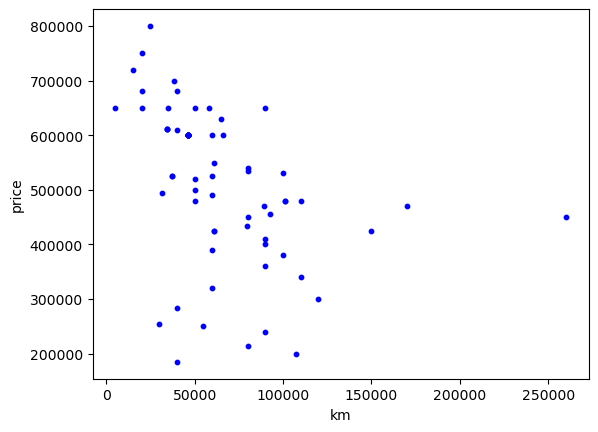

In [3]:
fig, ax = plt.subplots()

ax.scatter(cars_subset['km_driven'].to_numpy(), cars_subset['selling_price'].to_numpy(), s=10, c='b')
ax.set_xlabel('km')
ax.set_ylabel('price')

plt.show()

This does not look like a linear dependence between price and kilometers driven. There seems to be no systematic dependence between both quantities at all. But intuition suggests that there should be one. Thus, we should take into account other features. Isn't it possible that the dependence between price and kilometers driven depends on the age of the car?

Let's visualize different ages.

In [4]:
fig, ax = plt.subplots()

ax.scatter(cars_subset['km_driven'].to_numpy(), cars_subset['selling_price'].to_numpy(),
           s=10, c=2020 - cars_subset['year'].to_numpy(), cmap='jet')
ax.set_xlabel('km')
ax.set_ylabel('price')

plt.show()

The blue region shows some linear structure and the reddish region, too. Thus, age should be taken into account for predicting prices. Now let's do two regressions: one for young cars and one for old ones.

In [5]:
from matplotlib import colors

def simple_linear_regression(X, y):
    B = np.ones((X.size, 2))
    B[:, 1] = X
    return np.linalg.solve(np.matmul(B.T, B), np.matmul(B.T, y))

year = 2014   # where to split the data set into young and old

mask_young = cars_subset['year'] > year
X_young = cars_subset.loc[mask_young, 'km_driven'].to_numpy()
y_young = cars_subset.loc[mask_young, 'selling_price'].to_numpy()

mask_old = cars_subset['year'] <= year
X_old = cars_subset.loc[mask_old, 'km_driven'].to_numpy()
y_old = cars_subset.loc[mask_old, 'selling_price'].to_numpy()

a_young = simple_linear_regression(X_young, y_young)
a_old = simple_linear_regression(X_old, y_old)

print(a_young)
print(a_old)

fig, ax = plt.subplots()

ax.scatter(cars_subset['km_driven'].to_numpy(), cars_subset['selling_price'].to_numpy(),
           s=10, c=(mask_young.to_numpy()), cmap=colors.ListedColormap(['r', 'b']))

xmin = 0
xmax = 260000
ax.plot([xmin, xmax], [a_young[0] + a_young[1] * xmin, a_young[0] + a_young[1] * xmax], '-b', label='young')
ax.plot([xmin, xmax], [a_old[0] + a_old[1] * xmin, a_old[0] + a_old[1] * xmax], '-r', label='old')

ax.set_xlabel('km')
ax.set_ylabel('price')
ax.legend()
plt.show()

[ 6.74201542e+05 -1.68902485e+00]
[3.64966780e+05 1.81825528e-01]


Given the kilometers driven, the simple formula
\begin{equation*}
\boxed{
y = 674202 - 1.69\,x
}
\end{equation*}
yields a prediction for the price we could get for a young car, where $x$ are the kilometers and y is the price.
For old cars we have the model
\begin{equation*}
\boxed{
y = 364967 + 0.18\,x
}
\end{equation*}

Note that this holds only for the selected car model. In addition, we only considered very simple hypotheses with only two parameters.

Instead of doing two one-dimensional regressions for young and old cars, we could do a two-dimensional regression including both features, km driven and age.

At first we look at the data.

In [6]:
import plotly.graph_objects as go

xcoords = cars_subset['km_driven'].to_numpy()
ycoords = 2020 - cars_subset['year'].to_numpy()
zcoords = cars_subset['selling_price'].to_numpy()

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

fig.add_trace(go.Scatter3d(
    x=xcoords, y=ycoords, z=zcoords,
    mode='markers',
    marker={'color': '#0000ff', 'size': 2}
))
fig.update_scenes(
    xaxis_title_text='km',
    yaxis_title_text='age',
    zaxis_title_text='price',
)

fig.show()

Then we do the regression.

In [7]:
X = np.stack((cars_subset['km_driven'].to_numpy(),
              2020 - cars_subset['year'].to_numpy()), axis=1)
y = cars_subset['selling_price'].to_numpy()

B = np.ones((X.shape[0], 3))
B[:, 1:] = X
a = np.linalg.solve(np.matmul(B.T, B), np.matmul(B.T, y))

print(a)

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=y,
    mode='markers',
    marker={'color': '#0000ff', 'size': 2}
))

xmin = 0
xmax = 250000
ymin = 0
ymax = 10
xcoords, ycoords = np.meshgrid([xmin, xmax], [ymin, ymax])
zcoords = a[0] + a[1] * xcoords + a[2] * ycoords
fig.add_trace(
    go.Surface(x=xcoords, y=ycoords, z=zcoords, showscale=False,
               colorscale=[[0, 'rgba(255, 0, 0, 0.8)'], [1, 'rgba(255, 0, 0, 0.8)']])
)

fig.update_scenes(
    xaxis_title_text='km',
    yaxis_title_text='age',
    zaxis_title_text='price',
)

fig.show()

[ 7.69448384e+05 -2.07046783e-01 -5.47861786e+04]


Now our model for the price $y$ depending on kilometers $x_1$ and age $x_2$ is
\begin{equation*}
\boxed{
y = 769448 - 0.21\,x_1 - 54786\,x_2.
}
\end{equation*}

### Limitations

Linear regression with linear functions yields inaccurate results if the data set does not show a linear structure. Also outliers may distort results. Thus, linear regression has to be used with care and preceeding visual analysis is mandatory.

Have a look at [Ascombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) for very different data sets all yielding the same result if linear regression with linear functions is used.

### Linear Regression with Seaborn

Seaborn offers `pairplot` for getting a first overview of mutual dependence of all variables. See [Plotting pairwise data relation ships](https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships) in the Seaborn documentation for more details.

In [8]:
import seaborn as sns

sns.pairplot(cars_subset)
plt.show()

Seaborn also provides linear regression directly. See [Estimating regression fits](https://seaborn.pydata.org/tutorial/regression.html) for more details.

In [9]:
sns.regplot(x='year', y='selling_price', data=cars_subset)

<Axes: xlabel='year', ylabel='selling_price'>

### Linear Regression with Scikit-Learn

Linear regression is implemented by almost all machine learning libraries. Scikit-Learn is a good choice due to its simple API. It offers a module `linear_model`.

We reimplement linear regression with two features for the above example of used car prices.

The workflow is as follows:
* create a `LinearRegression` object,
* fit the object to the data (that is, do the regression),
* extract the coefficients from the object or use the object for prediction.

In [10]:
# X, y from above

import sklearn.linear_model as lm

regression = lm.LinearRegression()

regression.fit(X, y)

print(regression.intercept_)    # a[0]
print(regression.coef_)         # a[1], a[2]

769448.3841336307
[-2.07046783e-01 -5.47861786e+04]


From Scikit-Learn we obtain identical coefficients as above. To evaluate the regression function call `predict`.

In [11]:
age = 3.5
km = 40000

price = regression.predict([[km, age]])

print(price)

[569414.88787459]


For comparison with more complex models below we calculate (root) mean squared error on the training set.

In [12]:
import sklearn.metrics as metrics

metrics.mean_squared_error(y, regression.predict(X), squared=False)

89976.37031916517

## Linear Regression with Nonlinear Functions

### Idea

We consider more general parameter dependent hypotheses of the form
\begin{equation*}
f_{\mathrm{approx}}(x)=a_1\,\varphi_1\bigl(x^{(1)},\ldots,x^{(m)}\bigr)+\cdots+a_\mu\,\varphi_\mu\bigl(x^{(1)},\ldots,x^{(m)}\bigr)=\sum_{\kappa=1}^\mu a_\kappa\,\varphi_\kappa\bigl(x^{(1)},\ldots,x^{(m)}\bigr),
\end{equation*}
where
$x=\bigl(x^{(1)},\ldots,x^{(m)}\bigr)$ is a feature vector, $a_1,\ldots,a_\mu$ are the parameters of the hypothesis $f_{\mathrm{approx}}$, and $\varphi_1,\ldots,\varphi_\mu$ are prescribed real-valued functions on $\mathbb{R}^m$.

Note that $f_{\mathrm{approx}}$ depends linearly on the parameters $a_1,\ldots,a_\mu$. Thus *linear* regression. In contrast, in *nonlinear* regression we would consider hypotheses containing the searched for parameters in a nonlinear fashion. This would be the most general case, which is rarely needed in practise.

### Example: Fitting a Parabola

Consider data with only one feature, that is, $m=1$. We would like to fit a parabola to such a data set.

In [13]:
rng = np.random.default_rng(0)

def f(x):
    return (x - 1) ** 2 + 1

fig, ax = plt.subplots()

xgrid = np.linspace(-1, 3, 100)
ax.plot(xgrid, f(xgrid), '-r')

x = rng.uniform(-0.5, 2.7, 20)
yy = f(x) + rng.normal(0, 0.3, 20)
ax.plot(x, yy, 'ob', markersize=5)

ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

In mathematical notation our hypotesis shall have the form
\begin{equation*}
f_{\mathrm{approx}}(x)=a_1\,x^2+a_2\,x+a_3,
\end{equation*}
where we replaced $x^{(1)}$ by $x$ since we only have one feature. Thus, fitting a parabola is a special case of our general linear regression approach with
\begin{equation*}
\mu=3,\qquad\varphi_1(x)=x^2,\qquad\varphi_2(x)=x,\qquad\varphi_3(x)=1.
\end{equation*}

### Example: Fitting Piecewise Linear Functions

Again consider data with only one feature. In addition, assume that the feature takes values in $[0,1]$. Then it might be a good idea to divide $[0,1]$ into $\mu-1$ equaly spaced subintervals for some fixed $\mu$. On each subinterval we could do a linear regression, but require that resulting lines are connected at the interval boundaries.

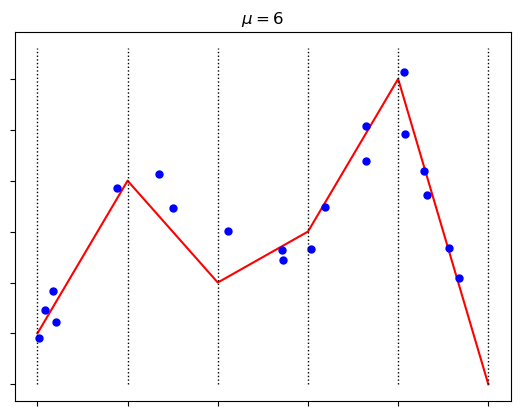

In [14]:
rng = np.random.default_rng(0)

def hat(x):
    return np.maximum(0, 1 - np.abs(x))

def f(x):
    return 0.5 * hat(5*x) + 2 * hat(5*x-1) + hat(5*x-2) + 1.5 * hat(5*x-3) + 3 * hat(5*x-4)

fig, ax = plt.subplots()

xgrid = np.linspace(0, 1, 6)
ax.plot(xgrid, f(xgrid), '-r')

x = rng.uniform(0, 1, 20)
yy = f(x) + rng.normal(0, 0.3, 20)
ax.plot(x, yy, 'ob', markersize=5)

for x in range(0, 6):
    ax.plot([x/5, x/5], [0, 3.3], 'k:', lw=1)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('$\mu=6$')

plt.show()

In our linear regression framework we could choose $\varphi_1,\ldots,\varphi_\mu$ to be hat functions of width $\frac{2}{\mu-1}$ centered at the interval boundaries $\frac{\kappa-1}{\mu-1}$ for $\kappa=1\ldots,\mu$:
\begin{equation*}
\varphi_\kappa(x)=\begin{cases}
(\mu-1)\,x-\kappa+2,&\text{if }x\in\bigl[\frac{\kappa-2}{\mu-1},\frac{\kappa-1}{\mu-1}\bigr],\\
-(\mu-1)\,x+\kappa,&\text{if }x\in\bigl[\frac{\kappa-1}{\mu-1},\frac{\kappa}{\mu-1}\bigr],\\
0,&\text{else}.
\end{cases}
\end{equation*}

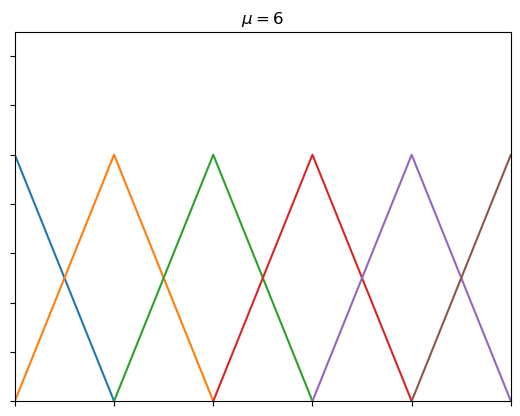

In [15]:
def hat(x):
    return np.maximum(0, 1 - np.abs(x))

fig, ax = plt.subplots()

xgrid = np.array([-1, 0, 1])

for x in range(0, 6):
    ax.plot(xgrid + x, hat(xgrid))

ax.set_xlim(0, 5)
ax.set_ylim(0, 1.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('$\mu=6$')

plt.show()

The parameters $a_1,\ldots,a_\mu$ describe the high of the hats or the function values of $f_{\mathrm{approx}}$ at the interval boundaries.

### Example: RBF Regression

Using several copies of a hat function and placing them at fixed grid points is a special case of RBF regression. Here RBF is the abbreviation of *radial basis function*. An RBF is a function that depends only on the length $|x|$ of a feature vector $x$ and not on the individual features. Thus, it is symmetric for one-dimensional feature vectors, cone shaped for two-dimensional feature vectors, and so on. RBFs typically have their maximum at 0 (the center) and then decay when distance from the center increases.

Next to hat functions
\begin{equation*}
\varphi(x)=\begin{cases}1-\frac{1}{c}\,|x|,&\text{if }|x|\leq c,\\0,&\text{else},\end{cases}
\end{equation*}
where $c>0$ controls the width of the hat ($c=\frac{1}{\mu-1}$ in the previous example), Gaussian RBFs
\begin{equation*}
\varphi(x)=\mathrm{e}^{-c\,|x|^2}
\end{equation*}
are widely used. Again, $c>0$ controls the width of the bell shaped curve.

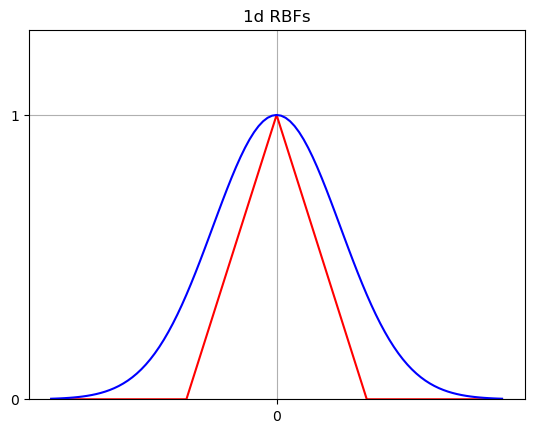

In [16]:
def hat(x):
    return np.maximum(0, 1 - np.abs(x))

def bell(x):
    return np.exp(-x**2)

fig, ax = plt.subplots()

xgrid = np.linspace(-2.5, 2.5, 101)
ax.plot(xgrid, hat(xgrid), '-r')
ax.plot(xgrid, bell(xgrid), '-b')

ax.set_ylim(0, 1.3)
ax.set_xticks([0])
ax.set_xticklabels([0])
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1])
ax.grid()
ax.set_title('1d RBFs')

plt.show()

In [17]:
def hat(x, y):
    return np.maximum(0, 1 - np.sqrt(x**2 + y**2))

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

xcoords, ycoords = np.meshgrid(np.linspace(-2.5, 2.5, 51), np.linspace(-2.5, 2.5, 51))
zcoords = hat(xcoords, ycoords)
fig.add_trace(
    go.Surface(x=xcoords, y=ycoords, z=zcoords, showscale=False,
               colorscale=[[0, 'rgba(255, 0, 0, 1)'], [1, 'rgba(255, 0, 0, 1)']])
)

fig.show()

In [18]:
def bell(x, y):
    return np.exp(-x**2-y**2)

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

xcoords, ycoords = np.meshgrid(np.linspace(-2.5, 2.5, 51), np.linspace(-2.5, 2.5, 51))
zcoords = bell(xcoords, ycoords)+1
fig.add_trace(
    go.Surface(x=xcoords, y=ycoords, z=zcoords, showscale=False,
               colorscale=[[0, 'rgba(0, 0, 255, 1)'], [1, 'rgba(0, 0, 255, 1)']])
)

fig.show()

Given fixed grid points $u_1,\ldots,u_\mu$ in the feature space we choose
\begin{equation*}
\varphi_1(x)=\varphi(x-u_1),\quad\ldots,\quad\varphi_\mu(x)=\varphi(x-u_\mu).
\end{equation*}

### Relation to Linear Regression with Linear Functions

Linear regression with nonlinear functions can be reduced to linear regression with linear functions studied above. We simply have to transform all feature vectors by applying the functions $\varphi_1,\ldots,\varphi_\mu$.

Given feature vectors $x_1,\ldots,x_n$ with $m$ features each we define new feature vectors $\tilde{x}_1,\ldots,\tilde{x}_n$ with $\mu$ features by
\begin{equation*}
\tilde{x}_1^{(\kappa)}:=\varphi_\kappa(x_1),\quad\ldots,\quad\tilde{x}_n^{(\kappa)}:=\varphi_\kappa(x_n)\qquad\text{for }\kappa=1,\ldots,\mu.
\end{equation*}
Now our hypothesis reads
\begin{equation*}
f_{\mathrm{approx}}(\tilde{x})=\sum_{\kappa=1}^\mu a_\kappa\,\tilde{x}^{(\kappa)}
\end{equation*}
with $\tilde{x}$ from $\mathbb{R}^\mu$.

### Implementation with Scikit-Learn

Scikit-Learn provides a module for preprocessing data. This module contains a [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class for creating transformer objects. The transformer object then provides a method [`fit_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform) doing the actual transformation.

Care has to be taken at the following point: Scikit-Learn's polynomial feature transform adds a feature which is always one. This feature corresponds to $x^0$. But the linear regression model adds this feature again. Thus, we end up with too many parameters. From the mathematical point of view this isn't a problem. But there might be confusion when evaluating the coefficients for some reason. Either set `include_bias` to `False` when creating the transformer object or set `fit_intercept` to `False` when creating the `LinearRegression` object.

Again we reuse the used car price example with two-dimensional feature space. Now we want to fit a second-order function to the data.

In [19]:
# X, y from above

from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2)
transformed_X = transformer.fit_transform(X)

print('shape of original data:   ', X.shape)
print('shape of transformed data:', transformed_X.shape)

shape of original data:    (69, 2)
shape of transformed data: (69, 6)


Starting with two features $x^{(1)}$ and $x^{(2)}$, we now have six features:
\begin{equation*}
\tilde{x}^{(1)}=1,\quad
\tilde{x}^{(2)}=x^{(1)},\quad
\tilde{x}^{(3)}=x^{(2)},\quad
\tilde{x}^{(4)}=\bigl(x^{(1)}\bigr)^2,\quad
\tilde{x}^{(5)}=x^{(1)}\,x^{(2)},\quad
\tilde{x}^{(6)}=\bigl(x^{(2)}\bigr)^2.
\end{equation*}

From here on regression works as usual.

In [20]:
regression = lm.LinearRegression(fit_intercept=False)
regression.fit(transformed_X, y)

# predict price
age = 3.5
km = 40000
price = regression.predict(transformer.fit_transform([[km, age]]))
print(price)

fig = go.Figure()
fig.layout.width = 800
fig.layout.height = 600

fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=y,
    mode='markers',
    marker={'color': '#0000ff', 'size': 2}
))

xmin = 0
xmax = 250000
ymin = 0
ymax = 10
grid_size = 20

xcoords, ycoords = np.meshgrid(np.linspace(xmin, xmax, grid_size), np.linspace(ymin, ymax, grid_size))
xyfeatures = np.stack((xcoords.reshape(-1), ycoords.reshape(-1)), axis=1)
zcoords = regression.predict(transformer.fit_transform(xyfeatures)).reshape(grid_size, grid_size)

fig.add_trace(
    go.Surface(x=xcoords, y=ycoords, z=zcoords, showscale=False,
               colorscale=[[0, 'rgba(255, 0, 0, 0.8)'], [1, 'rgba(255, 0, 0, 0.8)']])
)

fig.update_scenes(
    xaxis_title_text='km',
    yaxis_title_text='age',
    zaxis_title_text='price',
)

fig.show()

metrics.mean_squared_error(y, regression.predict(transformed_X), squared=False)

[569498.41773257]


88734.00776114204